# **Regresión lineal**

## **Importar librerías**

In [ ]:
#importar todas las bibliotecas necesarias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
sns.set(style='whitegrid')

# Selección de características
from sklearn.feature_selection import RFE

# Escalador
from sklearn.preprocessing import MinMaxScaler

# Modelado, Evaluación
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

# **Cargar datos**

In [ ]:
# Cargando datos en pandas DataFrame
df = pd.read_csv('clean_house_data.csv')
df.head()

,Unnamed: 0,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,long_2,long_3,long_4,long_5,long_6,long_7,long_8,long_9,lat_2,lat_3,lat_4,lat_5,lat_6,lat_7,lat_8,lat_9,waterfront_1,floors_2,floors_3,floors_4,view_1,view_2,view_3,view_4,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,sqft_basement_1
0,0,-1.524727,-1.109378,-0.517790,-1.037937,-0.517790,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.325577,0.694311,-0.115464,-0.247134,0.007616,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2,-2.013671,-2.131682,0.562796,1.064091,0.154186,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3,0.559811,0.051460,-0.718462,-0.985610,-0.744694,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,4,0.226489,-0.293986,0.128003,-0.062770,-0.040336,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21597 non-null  int64  
 1   price               21597 non-null  float64
 2   sqft_living         21597 non-null  float64
 3   sqft_lot            21597 non-null  float64
 4   sqft_living15       21597 non-null  float64
 5   sqft_lot15          21597 non-null  float64
 6   yr_built_1930_1960  21597 non-null  int64  
 7   yr_built_1960_1990  21597 non-null  int64  
 8   yr_built_1990_2020  21597 non-null  int64  
 9   condition_2         21597 non-null  int64  
 10  condition_3         21597 non-null  int64  
 11  condition_4         21597 non-null  int64  
 12  condition_5         21597 non-null  int64  
 13  long_2              21597 non-null  int64  
 14  long_3              21597 non-null  int64  
 15  long_4              21597 non-null  int64  
 16  long

In [ ]:
df.isna().sum()

Unnamed: 0            0
price                 0
sqft_living           0
sqft_lot              0
sqft_living15         0
sqft_lot15            0
yr_built_1930_1960    0
yr_built_1960_1990    0
yr_built_1990_2020    0
condition_2           0
condition_3           0
condition_4           0
condition_5           0
long_2                0
long_3                0
long_4                0
long_5                0
long_6                0
long_7                0
long_8                0
long_9                0
lat_2                 0
lat_3                 0
lat_4                 0
lat_5                 0
lat_6                 0
lat_7                 0
lat_8                 0
lat_9                 0
waterfront_1          0
floors_2              0
floors_3              0
floors_4              0
view_1                0
view_2                0
view_3                0
view_4                0
bedrooms_2            0
bedrooms_3            0
bedrooms_4            0
bedrooms_5            0
bedrooms_6      

In [ ]:
def modelRegresionLineal(y, X, datos):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    linregresion = LinearRegression()
    linregresion.fit(X_train, y_train)

   #Cálculo de predicciones en el conjunto de entrenamiento y en el conjunto de prueba
    y_hat_train = linregresion.predict(X_train)
    y_hat_test = linregresion.predict(X_test)

    #Calculando los residuos
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test  

    #Cálculo del error cuadrático medio
    from sklearn.metrics import mean_squared_error
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    #Grafico de disperción para comprar la relacion entre los datos de prueba y los datos pronosticados 
    plt.figure(figsize=(12,5))
    sns.regplot(y_test,y_hat_test,datos,color='purple')
    plt.xlabel("PRECIOS DE PRUEBA")
    plt.ylabel("PRECIOS PREVISTOS")
    plt.title("CURVA DE REGRESIÓN LINEAL")
    plt.savefig("RegresionLineal")

    print('R^2 Puntaje:',round(linregresion.score(X, y),2))
    print('Error cuadrático medio sobre datos entrenamiento:', train_mse)
    print('Error cuadrático medio sobre datos de Prueba:', test_mse)

    # Visualización de selección de 100 precios de casas
    plt.figure(figsize=(16,6))
    sns.scatterplot(range(len(y_hat_test[:100])), y_hat_test[:100], label='Precios pronosticados')
    sns.scatterplot(range(len(y_hat_test[:100])), y_test[:100], label='Precios reales')
    plt.title('Comparación del precio previsto con el precio real', fontdict={'fontsize': 15}), plt.xlabel('Observacion'), plt.ylabel('Precios')
    plt.legend(), plt.show()
    return (linregresion)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


R^2 Puntaje: 0.81
Error cuadrático medio sobre datos entrenamiento: 0.18869945543729796
Error cuadrático medio sobre datos de Prueba: 0.19406018169080316


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


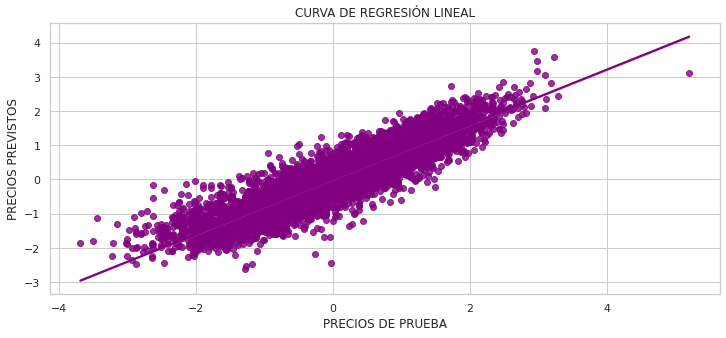

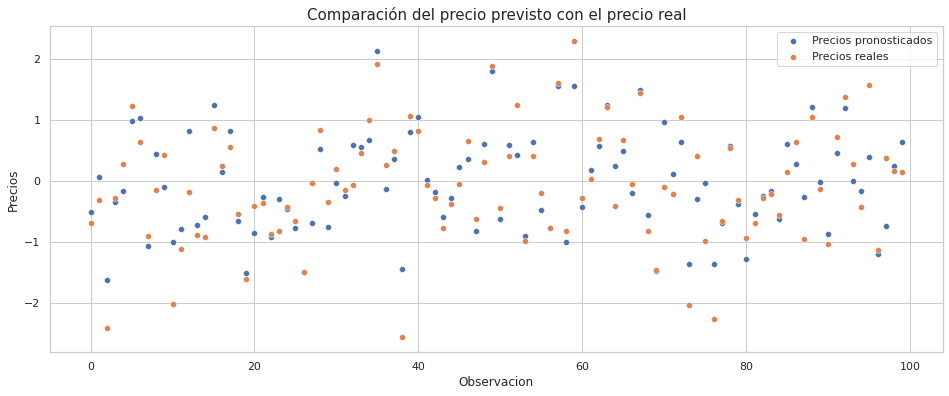

LinearRegression()

In [ ]:
#definiendo el objetivo y los predictores
y = df.price
X = df.drop(['price'], axis=1)

#Ejecutar el modelo con la funcion de Regresión lineal
modelRegresionLineal(y,X,df)

# **ÁRBOL DE DECISIÓN CLASIFICACIÓN**

Ingeniería de características básicas para crear una columna etiquetada llamada newPrice para aprendizaje supervisado 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df['price'].mean()

-0.00013345197382463403

In [ ]:
def valores(price):
    if price > -0.00013345197382463403:
        return 1
    else:
        return 0
df['newPrice']=df['price'].apply(valores)


In [ ]:
df.head(2)

,Unnamed: 0,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,long_2,long_3,long_4,long_5,long_6,long_7,long_8,long_9,lat_2,lat_3,lat_4,lat_5,lat_6,lat_7,lat_8,lat_9,waterfront_1,floors_2,floors_3,floors_4,view_1,view_2,view_3,view_4,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,sqft_basement_1,newPrice
0,0,-1.524727,-1.109378,-0.517790,-1.037937,-0.517790,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0.325577,0.694311,-0.115464,-0.247134,0.007616,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
y = df['newPrice']

In [ ]:
dectree = DecisionTreeClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
dectree = dectree.fit(X_train,y_train)

In [ ]:
pred = dectree.predict(X_test)

**ANÁLISIS DE RENDIMIENTO**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print("\nINFORME DE CLASIFICACIÓN:\n\n",classification_report(y_test,pred))
print("\nMATRIZ DE CONFUSIÓN: \n\n",confusion_matrix(y_test,pred))


INFORME DE CLASIFICACIÓN:

               precision    recall  f1-score   support

           0       0.85      0.84      0.84      3288
           1       0.83      0.85      0.84      3192

    accuracy                           0.84      6480
   macro avg       0.84      0.84      0.84      6480
weighted avg       0.84      0.84      0.84      6480


MATRIZ DE CONFUSIÓN: 

 [[2749  539]
 [ 484 2708]]


In [ ]:
### Evaluar el modelo
 
print("MSE: ", metrics.mean_squared_error(y_test, pred))

# Accuracy: ¿con qué frecuencia es correcto el clasificador?
print("Accuracy:", metrics.accuracy_score(y_test, pred))

# Precision: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
print("Precision:", metrics.precision_score(y_test, pred))

#  Recall: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
print("Recall:", metrics.recall_score(y_test, pred))

MSE:  0.15787037037037038
Accuracy: 0.8421296296296297
Precision: 0.8340006159531875
Recall: 0.8483709273182958


# **RANDOM FOREST CLASIFICACIÓN**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
preds = rfc.predict(X_test)

In [ ]:
preds

array([0, 1, 1, ..., 0, 0, 1])

**ANÁLISIS DE RENDIMIENTO**

In [ ]:
print("\nCLASSIFICATION REPORT:\n\n",classification_report(y_test,preds))
print("\nCONFUSION MATRIX: \n\n",confusion_matrix(y_test,preds))


CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.90      0.88      0.89      3288
           1       0.88      0.90      0.89      3192

    accuracy                           0.89      6480
   macro avg       0.89      0.89      0.89      6480
weighted avg       0.89      0.89      0.89      6480


CONFUSION MATRIX: 

 [[2909  379]
 [ 321 2871]]


In [ ]:
### Evaluar el modelo

print("MSE: ", metrics.mean_squared_error(y_test, preds))

# Accuracy: ¿con qué frecuencia es correcto el clasificador?
print("Accuracy:", metrics.accuracy_score(y_test, preds))

# Precision: ¿qué porcentaje de tuplas positivas se etiquetan como tales?
print("Precision:", metrics.precision_score(y_test, preds))

#  Recall: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
print("Recall:", metrics.recall_score(y_test, preds))

MSE:  0.10802469135802469
Accuracy: 0.8919753086419753
Precision: 0.8833846153846154
Recall: 0.8994360902255639
